# Data

In [ ]:
import copy
import math
import random

In [ ]:
Nm , Nt = 2,17
Na = 8

activities = [a for a in range(Na)]
modes = [1,2]
resources = ['R1','R2']
times = [t for t in range(20)]
durations = {
    (0, 1): 0, (0, 2): 0,
    (1, 1): 3, (1, 2): 4,
    (2, 1): 2, (2, 2): 4,
    (3, 1): 2, (3, 2): 3,
    (4, 1): 2, (4, 2): 2,
    (5, 1): 3, (5, 2): 3,
    (6, 1): 4, (6, 2): 6,
    (7, 1): 0, (7, 2): 0
}
B = {'R1': 4, 'R2':15}
precedence_constraints = [(0,1), (0,2), (1,3), (3,5),(2,4), (4,6),(5,7), (6,7)]  # Precedence
q  = {
    (0, 1, 'R1'): 0, (0, 1, 'R2'): 0,
    (1, 1, 'R1'): 2, (1, 1, 'R2'): 5,
    (1, 2, 'R1'): 1, (1, 2, 'R2'): 1,
    (2, 1, 'R1'): 3, (2, 1, 'R2'): 6,
    (2, 2, 'R1'): 3, (2, 2, 'R2'): 2,
    (3, 1, 'R1'): 4, (3, 1, 'R2'): 2,
    (3, 2, 'R1'): 2, (3, 2, 'R2'): 2,
    (4, 1, 'R1'): 3, (4, 1, 'R2'): 6,
    (4, 2, 'R1'): 4, (4, 2, 'R2'): 4,
    (5, 1, 'R1'): 3, (5, 1, 'R2'): 1,
    (5, 2, 'R1'): 1, (5, 2, 'R2'): 7,
    (6, 1, 'R1'): 2, (6, 1, 'R2'): 1,
    (6, 2, 'R1'): 1, (6, 2, 'R2'): 1,
    (7, 1, 'R1'): 0, (7, 1, 'R2'): 0,
}

pop_size = 400

#################
#################
#################
#################
#################
#################

Na = 11
pop_size = 300

activities = [a for a in range(Na)]
modes = [1,2]
B = {'R1': 2, 'R2':28}
precedence_constraints = [(0,1), (0,2), (0,3), (0,4), (1,9),(4,8),
                          (2,5),(3,6),(5,7),(6,7),(8,10),(7,9),(9,10)]  # Precedence

durations = {
    (0, 1): 0, (0, 2): 0,
    (1, 1): 2, (1, 2): 3,
    (2, 1): 2, (2, 2): 4,
    (3, 1): 2, (3, 2): 3,
    (4, 1): 1, (4, 2): 2,
    (5, 1): 2, (5, 2): 4,
    (6, 1): 2, (6, 2): 3,
    (7, 1): 1, (7, 2): 2,
    (8, 1): 1, (8, 2): 3,
    (9, 1): 4, (9, 2): 6,
    (10, 1): 0, (10, 2): 0,
}

q = {
    (0, 1, 'R1'): 0, (0, 2, 'R2'): 0,
    (1, 1, 'R1'): 2, (1, 1, 'R2'): 4,
    (1, 2, 'R1'): 1, (1, 2, 'R2'): 2,
    (2, 1, 'R1'): 1, (2, 1, 'R2'): 5,
    (2, 2, 'R1'): 1, (2, 2, 'R2'): 2,
    (3, 1, 'R1'): 1, (3, 1, 'R2'): 3,
    (3, 2, 'R1'): 1, (3, 2, 'R2'): 1,
    (4, 1, 'R1'): 1, (4, 1, 'R2'): 2,
    (4, 2, 'R1'): 1, (4, 2, 'R2'): 1,
    (5, 1, 'R1'): 2, (5, 1, 'R2'): 5,
    (5, 2, 'R1'): 2, (5, 2, 'R2'): 3,
    (6, 1, 'R1'): 1, (6, 1, 'R2'): 4,
    (6, 2, 'R1'): 1, (6, 2, 'R2'): 3,
    (7, 1, 'R1'): 2, (7, 1, 'R2'): 2,
    (7, 2, 'R1'): 2, (7, 2, 'R2'): 1,
    (8, 1, 'R1'): 2, (8, 1, 'R2'): 3,
    (8, 2, 'R1'): 1, (8, 2, 'R2'): 2,
    (9, 1, 'R1'): 1, (9, 1, 'R2'): 3,
    (9, 2, 'R1'): 1, (9, 2, 'R2'): 1,
    (10, 1, 'R1'): 0, (10, 2, 'R2'): 0
}
precedence_constraints

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 9),
 (4, 8),
 (2, 5),
 (3, 6),
 (5, 7),
 (6, 7),
 (8, 10),
 (7, 9),
 (9, 10)]

In [ ]:
def bit_for_time(num_time_steps):
  return math.ceil(math.log2(num_time_steps)) + 5

def bit_for_mode(Nm):
  return math.ceil(math.log2(Nm))


def bits_per_activity(num_modes, num_time_steps):
    return bit_for_mode(num_modes) + bit_for_time(num_time_steps)

def slice_by_chunks(lst, chunk_size):
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]

def multiply_with_powers_of_two(input_list):
    powers = [2**i for i in range(len(input_list))]
    return sum([a * b for a, b in zip(input_list, powers)])

def decode_chromosome(chromosome:list, num_modes:int, num_time_steps:int):
    mode_bits_len = bit_for_mode(num_modes)
    time_bits_len = bit_for_time(num_time_steps)
    bpa = bits_per_activity(num_modes, num_time_steps)
    num_activities = int(len(chromosome) / bpa)

    activities = slice_by_chunks(chromosome, bpa)
    activity_data = []

  # Optional: print chunk sizes to verify
    for i, chunk in enumerate(activities):
        #print(f"Chunk {i}: {chunk}")
        if i== 0:
          activity_data.append((i, 1, 0))
        else:
          mode = chunk[0]+1
          time_binary = chunk[1:]
          time = int(Nt*multiply_with_powers_of_two(time_binary)/(2**(len(time_binary)) ))
          #print(f"Mode: {mode}, Time: {time}")
          activity_data.append((i, mode, time))

    return activity_data

def generate_population(pop_size, num_activities, num_modes, num_time_steps):
  bpa = bits_per_activity(num_modes, num_time_steps)
  chromosome_length = num_activities * bpa
  population = [
      [random.randint(0, 1) for _ in range(chromosome_length)]
      for _ in range(pop_size)
  ]
  return population


def generate_AI_population(pop_size, num_activities, num_modes, num_time_steps):
  bpa = bits_per_activity(num_modes, num_time_steps)
  chromosome_length = num_activities * bpa
  population = [[0] +
      [random.randint(0, 1) for _ in range(chromosome_length-1)]
      for _ in range(pop_size)
  ]
  return population


def calculate_precedence_penalty(schedule, durations, precedence_constraints,resource_consumption:dict, resources, penalty_per_violation=10):
    # Build lookup table from schedule
    schedule_dict = {a: {'mode': m, 'start': t, 'end': t + durations[(a, m)]} for (a, m, t) in schedule}
    schedule_dict[0] = {'mode': 1, 'start': 0, 'end': 0}  # assume dummy start at time 0 with 0 duration

    #print('OOOO',schedule_dict)
    violations = []
    total_penalty = 0

    for (pred, succ) in precedence_constraints:
      #print(pred, succ)
      if pred not in schedule_dict or succ not in schedule_dict:
          continue  # skip if one of the activities is not scheduled
      pred_end = schedule_dict[pred]['end']
      succ_start = schedule_dict[succ]['start']
      if succ_start < pred_end:
        total_penalty += (pred_end-succ_start)*penalty_per_violation

    return total_penalty
def calculate_resource_violation(schedule:list, durations:dict, resource_consumption:dict, resource_availability:dict, time_horizon:int, penalty_per_violation=1):
    # Step 1: Initialize resource usage timeline
    usage = {r: [0] * time_horizon for r in resource_availability}

    # Step 2: Accumulate resource usage per time step
    for a, m, start in schedule:
        dur = durations[(a, m)]
        for t in range(start, min(start + dur, time_horizon)):
            for r in resource_availability:
                usage[r][t] += resource_consumption.get((a, m, r), 0)

    # Step 3: Check for violations
    total_penalty = 0
    violations = {}
    for r in resource_availability:
        for t in range(time_horizon):
            overuse = usage[r][t] - resource_availability[r]
            if overuse > 0:
                violations[(r, t)] = overuse
                total_penalty += overuse * penalty_per_violation

    return total_penalty

def calculate_makespan(schedule, durations):
    """
    Calculates the makespan (maximum finish time) of a schedule.

    Args:
        schedule (list of tuples): Each tuple is (activity, mode, start_time)
        durations (dict): Mapping from (activity, mode) to duration

    Returns:
        int: The makespan (latest finish time)
    """
    return max(start + durations[(a, m)] for a, m, start in schedule)

def eval_chromosome(chromosome,durations,n_modes,n_time):
  schedule = decode_chromosome(chromosome,num_modes=n_modes, num_time_steps =n_time)
  penalty1 = calculate_precedence_penalty(schedule, durations, precedence_constraints,q,resources, penalty_per_violation=1)
  penalty2 = calculate_resource_violation(schedule, durations, resource_consumption=q, resource_availability=B, time_horizon=n_time, penalty_per_violation=1)
  Tmax = calculate_makespan(schedule, durations)
  #print(Tmax, schedule, penalty1, penalty2)
  return Tmax + penalty1*100+50*penalty2

def weighted_random_selection(A, B, k=2):
    epsilon = 1e-6  # avoid division by zero
    weights = [1 / (b + epsilon) for b in B]
    return random.choices(A, weights=weights, k=k)

def create_next_generation_via_crossover(population, values):
  crossover_prob = 0.7
  new_population = []
  working_pop = copy.deepcopy(population)
  while len(new_population)<0.5*len(population):
    [p1,p2] = weighted_random_selection(working_pop, values, k=2)
    c1 = [p1[i]  if random.random() < crossover_prob else p2[i] for i in range(len(p1))]
    c2 = [p2[i]  if random.random() < crossover_prob else p1[i] for i in range(len(p1))]
    new_population.append(c1)
    new_population.append(c2)

  new_population += generate_AI_population(10, Na, Nm, Nt)

  return new_population

def create_next_generation_via_mutation(population, values):
  mutation_prob = 0.05
  new_population = []
  working_pop = copy.deepcopy(population)
  while len(new_population)<0.5*len(population):
    [p1] = weighted_random_selection(working_pop, values, k=1)
    c1 = [1-p1[i]  if random.random() < mutation_prob else p1[i] for i in range(len(p1))]
    new_population.append(c1)
  return new_population

def calc_val(sample_population):
  v= []
  for chrom in sample_population:
    v.append(eval_chromosome(chrom,durations,Nm,Nt))
  return v

def select_lowest_n(A, B, N):
    combined = list(zip(A, B))
    sorted_by_b = sorted(combined, key=lambda x: x[1])

    sorted_by_bnegative = sorted(combined, key=lambda x: -x[1])

    p1 = [a for a, b in sorted_by_b[:5]] # select best 5
    v1 = [b for a, b in sorted_by_b[:5]]

    p2 = [a for a, b in sorted_by_bnegative[:N-5]]
    v2 = [b for a, b in sorted_by_bnegative[:N-5]]

    return p1+p2 , v1+v2

In [ ]:
bpa = bits_per_activity(Nm, Nt)
#random.seed(42)
chromosome = [random.randint(0, 1) for _ in range(bits_per_activity(Nm, Nt) * Na)]
chromosome
decode_chromosome(chromosome, Nm, Nt)


[(0, 1, 0),
 (1, 1, 6),
 (2, 1, 7),
 (3, 1, 8),
 (4, 1, 13),
 (5, 2, 8),
 (6, 2, 9),
 (7, 1, 3),
 (8, 2, 0),
 (9, 2, 15),
 (10, 2, 5)]

In [ ]:
population = generate_population(pop_size, Na, Nm, Nt)
values = calc_val(population)

In [ ]:
for counter in range(2000):
  pop2 = create_next_generation_via_crossover(population, values)
  values2 = calc_val(pop2)

  pop3 = create_next_generation_via_mutation(population, values)
  values3 = calc_val(pop3)

  population += pop2 + pop3
  values += values2  + values3

  population, values = select_lowest_n(population, values, pop_size)

  #print(len(new_population), len(values), len(population2),len(values2))
  #population, values = select_best_individuals(population, values, population2, values2, new_pop_size=pop_size)
  if counter % 100 == 0:
    print(counter, min(values) , max(values))

0 1116 7818
100 16 9768
200 16 10069
300 16 10520
400 16 10570
500 16 10670
600 16 10720
700 16 10820
800 16 10920
900 16 10920
1000 16 11020
1100 16 11020
1200 16 11020
1300 16 11020
1400 16 11020
1500 16 11020
1600 16 11020
1700 16 11020
1800 16 11020
1900 16 11020


Value =  16
VV =  16
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1] [(0, 1, 0), (1, 2, 6), (2, 1, 0), (3, 1, 0), (4, 2, 2), (5, 1, 4), (6, 2, 8), (7, 1, 11), (8, 2, 12), (9, 1, 12), (10, 2, 16)]
alireza 0 0 16
    Activity  Mode  Start  Duration  Finish
0          0     1      0         0       0
1          1     2      6         3       9
2          2     1      0         2       2
3          3     1      0         2       2
4          4     2      2         2       4
5          5     1      4         2       6
6          6     2      8         3      11
7          7     1     11         1      12
8          8     2     12         3      15
9          9     1     12        

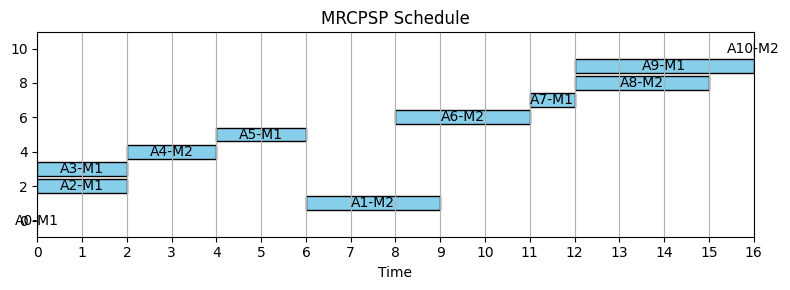

{'R1': [2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0],
 'R2': [8, 8, 1, 1, 5, 5, 2, 2, 5, 3, 3, 2, 5, 5, 5, 3, 0]}

In [ ]:
chromosome = population[1]
print('Value = ', values[1])


vv = eval_chromosome(chromosome,durations,Nm,Nt)
print('VV = ', vv)



schedule = decode_chromosome(chromosome,Nm,Nt)
print(chromosome,schedule)

Tmax = calculate_makespan(schedule, durations)

#schedule = [(0,1,0), (1,2,0),(2,1,0),(3,2,4),(4,1,2),(5,2,7),(6,2,4),(7,1,10)]
#schedule = decode_chromosome(chromosome,num_modes=n_modes, num_time_steps =n_time)
p1 = calculate_precedence_penalty(schedule, durations, precedence_constraints,q,resources, penalty_per_violation=1)
p2 = calculate_resource_violation(schedule, durations, resource_consumption=q, resource_availability=B, time_horizon=Nt, penalty_per_violation=1)
Tmax = calculate_makespan(schedule, durations)
print('alireza',p1,p2,Tmax)

solution = []
for (a,m,t) in schedule:
      dur = durations[(a, m)]
      solution.append((a, m, t, dur))
solution

import pandas as pd
import matplotlib.pyplot as plt
# Simulated output: list of (activity, selected mode, start time, duration)
# Replace this with actual values from your Pyomo model
# Build a DataFrame
df = pd.DataFrame(solution, columns=['Activity', 'Mode', 'Start', 'Duration'])
df['Finish'] = df['Start'] + df['Duration']
print(df)
# Plot Gantt chart
fig, ax = plt.subplots(figsize=(8, 3))
for idx, row in df.iterrows():
    ax.barh(row['Activity'], row['Duration'], left=row['Start'], color='skyblue', edgecolor='black')
    ax.text(row['Start'] + row['Duration'] / 2, idx, f"A{row['Activity']}-M{row['Mode']}", va='center', ha='center', color='black', fontsize=10)

usage = {r: [0] * Nt for r in B}

# Step 2: Accumulate resource usage per time step
for a, m, start in schedule:
    dur = durations[(a, m)]
    for t in range(start, min(start + dur, Nt)):
        for r in B:
            usage[r][t] += q.get((a, m, r), 0)


ax.set_xlabel("Time")
ax.set_title("MRCPSP Schedule")
ax.grid(True, axis='x')
plt.xticks(range(Nt))
plt.tight_layout()
plt.show()
usage